# PDF提取

## 不同类型的PDF
### 机器生成的pdf文件：这些pdf文件是在计算机上使用W3C技术(如HTML、CSS和Javascript)或其他软件(如Adobe Acrobat、Word或Typora等MarkDown工具)创建的。这种类型的文件可以包含各种组件，例如图像、文本和链接，这些组件都是可以被选中、搜索和易于编辑的。
### 传统扫描文档：这些PDF文件是通过扫描仪、手机是的扫描王这样的APP从实物上扫描创建的。这些文件只不过是存储在PDF文件中的图像集合。也就是说，出现在这些图像中的元素，如文本或链接是不能被选择或搜索的。本质上，PDF只是这些图像的容器而已。
### 带OCR的扫描文档：这种类似有点特殊，在扫描文档后，使用光学字符识别(OCR)软件识别文件中每个图像中的文本，将其转换为可搜索和可编辑的文本。然后软件会在图像上添加一个带有实际文本的图层，这样你就可以在浏览文件时选择它作为一个单独的组件。但是有时候我们不能完全信任OCR，因为它还是存在一定几率的识别错误的。

参考文档：https://www.luxiangdong.com/2023/10/05/extract/#/%E5%AE%9A%E4%B9%89%E4%BB%8EPDF%E4%B8%AD%E6%8F%90%E5%8F%96%E6%96%87%E6%9C%AC%E7%9A%84%E5%87%BD%E6%95%B0

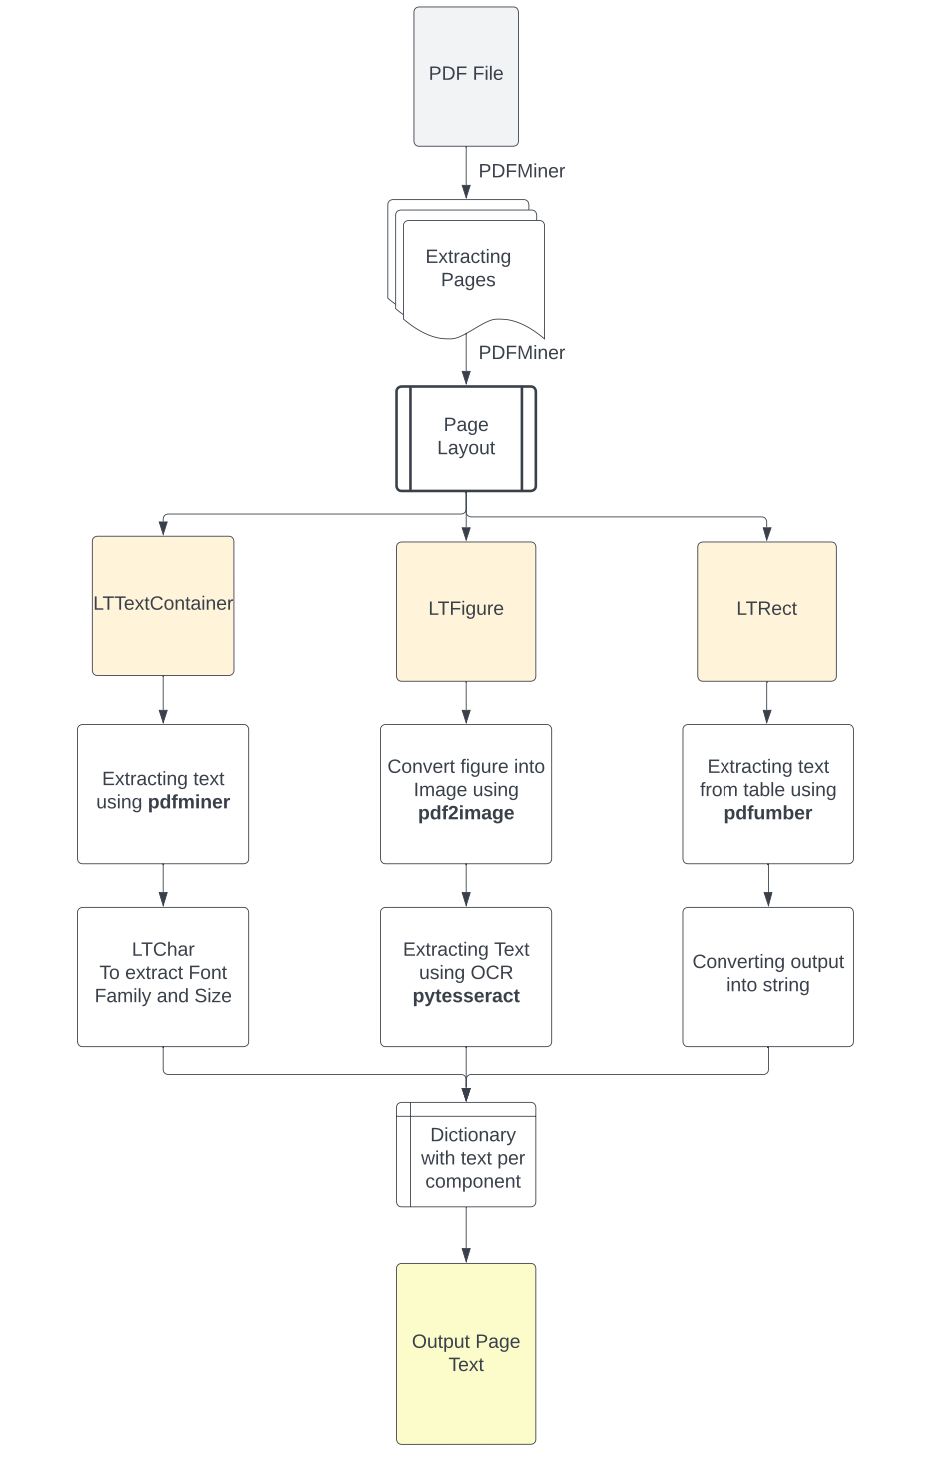

In [ ]:
# 安装涉及的PDF解析库

# PyPDF2：从存储路径读取PDF文件
pip install poppler
pip install PyPDF2
# Pdfminer ：执行布局分析并从PDF中提取文本和格式。(.six版本的库是支持Python 3的版本)
pip install pdfminer.six
# Pdfplumber： 识别PDF页面中的table并从中提取信息。
pip install pdfplumber
# Pdf2image：将裁剪后的PDF图像转换为PNG图像。需要先安装poppler，有依赖，pip安装不成功就brew
#!arch -arm64 brew install poppler
pip install pdf2image
# PIL： 读取PNG图像
pip install Pillow
# Pytesseract： 从图像中提取文本使用OCR技术,先安装tesseract，再装pytesseract, pip安装不成功就brew
pip install tesseract
#!arch -arm64 brew install tesseract
pip install pytesseract

In [22]:
!arch -arm64 brew install tesseract

==> Fetching dependencies for tesseract: leptonica, libb2 and libarchive
==> Fetching leptonica
==> Downloading https://mirrors.tuna.tsinghua.edu.cn/homebrew-bottles//leptonica
######################################################################### 100.0%
==> Fetching libb2
==> Downloading https://mirrors.tuna.tsinghua.edu.cn/homebrew-bottles//libb2-0.9
######################################################################### 100.0%
==> Fetching libarchive
==> Downloading https://mirrors.tuna.tsinghua.edu.cn/homebrew-bottles//libarchiv
######################################################################### 100.0%
==> Fetching tesseract
==> Downloading https://mirrors.tuna.tsinghua.edu.cn/homebrew-bottles//tesseract
######################################################################### 100.0%
==> Installing dependencies for tesseract: leptonica, libb2 and libarchive
==> Installing tesseract dependency: leptonica
==> Pouring leptonica-1.83.1.arm64_ventura.bottle.tar.gz
🍺  /opt/hom

In [9]:
# 读取PDF
import PyPDF2
# 分析PDF的layout，提取文本
from pdfminer.high_level import extract_pages, extract_text
from pdfminer.layout import LTTextContainer, LTChar, LTRect, LTFigure
# 从PDF的表格中提取文本
import pdfplumber
# 从PDF中提取图片
from PIL import Image
from pdf2image import convert_from_path
# 运行OCR从图片中提取文本
import pytesseract 
# 清除过程中的各种过程文件
import os

## 分析PDF的layout，提取文本

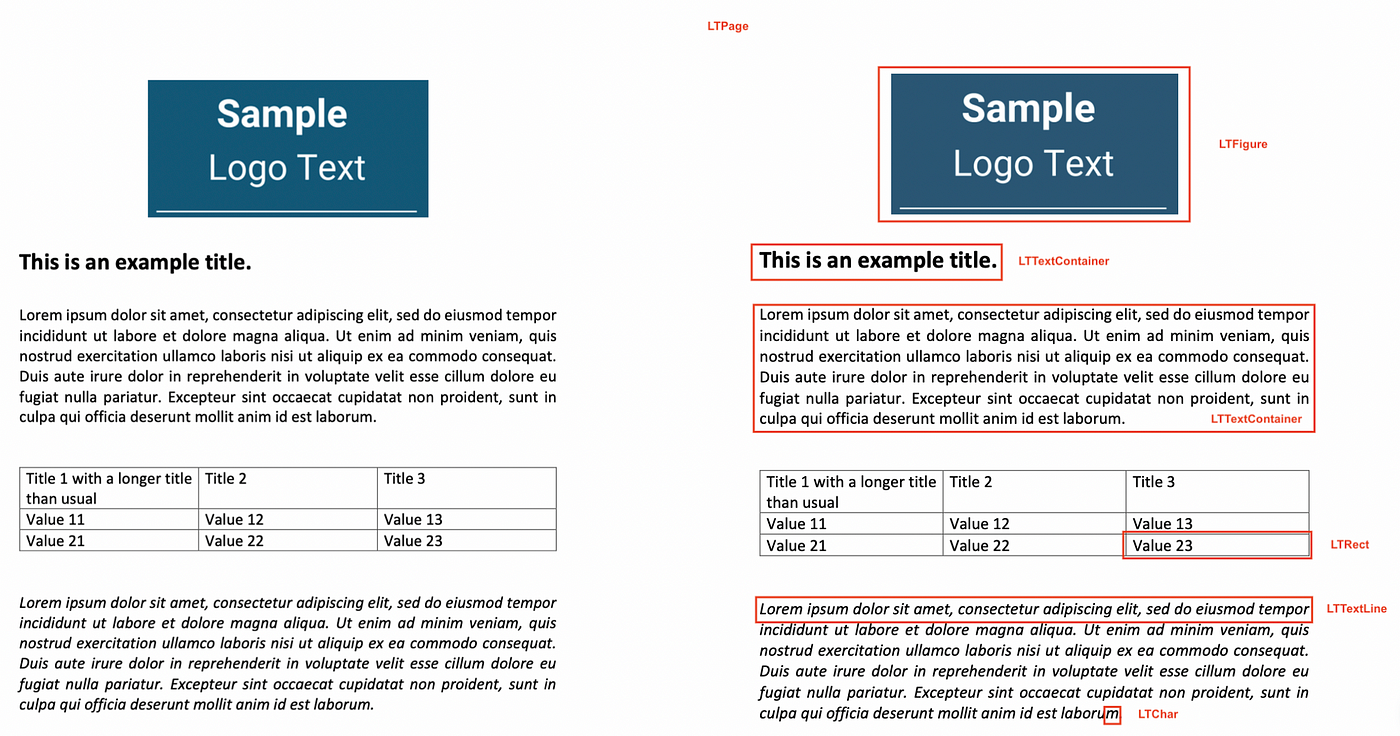

使用PDFMiner的Python库将文档对象中的文本分离为多个页面对象，然后分解并检查每个页面的布局。PDF文件本身缺乏结构化信息，如我们可以一眼识别的段落、句子或单词等。相反，它们只理解文本中的单个字符及其在页面上的位置。通过这种方式，PDFMiner尝试将页面的内容重构为单个字符及其在文件中的位置。然后，通过比较这些字符与其他字符的距离，它组成适当的单词、句子、行和文本段落。为了实现这一点，PDFMiner使用高级函数extract_pages()从PDF文件中分离各个页面，并将它们转换为LTPage对象。

然后，对于每个LTPage对象，它从上到下遍历每个元素，并尝试将适当的组件识别为:

LTFigure：表示PDF中页面上的图形或图像的区域。
LTTextContainer：代表一个矩形区域（段落）中的一组文本行（line），然后进一步分析成LTTextLine对象的列表。它们中的每一个都表示一个LTChar对象列表，这些对象存储文本的单个字符及其元数据。
LTRect表示一个二维矩形，可用于在LTPage对象中占位区或者Panel，图形或创建表。
因此，使用Python对页面进行重构之后，将页面元素分类为LTFigure(图像或图形)、LTTextContainer(文本信息)或LTRect(表格)，我们就可以选择适当的函数来更好地提取内容信息了。

In [25]:
for pagenum, page in enumerate(extract_pages(pdf_path)):

    # Iterate the elements that composed a page
    for element in page:

        # Check if the element is a text element
        if isinstance(element, LTTextContainer):
            # Function to extract text from the text block
            pass
            # Function to extract text format
            pass

        # Check the elements for images
        if isinstance(element, LTFigure):
            # Function to convert PDF to Image
            pass
            # Function to extract text with OCR
            pass

        # Check the elements for tables
        if isinstance(element, LTRect):
            # Function to extract table
            pass
            # Function to convert table content into a string
            pass

In [10]:
# 从文本框中提取文本
# 创建一个文本提取函数

def text_extraction(element):
    # 从行元素中提取文本
    line_text = element.get_text()
    
    # 探析文本的格式
    # 用文本行中出现的所有格式初始化列表
    line_formats = []
    for text_line in element:
        if isinstance(text_line, LTTextContainer):
            # 遍历文本行中的每个字符
            for character in text_line:
                if isinstance(character, LTChar):
                    # 追加字符的font-family
                    line_formats.append(character.fontname)
                    # 追加字符的font-size
                    line_formats.append(character.size)
    # 找到行中唯一的字体大小和名称
    format_per_line = list(set(line_formats))
    
    # 返回包含每行文本及其格式的元组
    return (line_text, format_per_line)

In [11]:
# 从图像中提取文本
# 创建一个从pdf中裁剪图像元素的函数
def crop_image(element, pageObj):
    # 获取从PDF中裁剪图像的坐标
    [image_left, image_top, image_right, image_bottom] = [element.x0,element.y0,element.x1,element.y1] 
    # 使用坐标(left, bottom, right, top)裁剪页面
    pageObj.mediabox.lower_left = (image_left, image_bottom)
    pageObj.mediabox.upper_right = (image_right, image_top)
    # 将裁剪后的页面保存为新的PDF
    cropped_pdf_writer = PyPDF2.PdfWriter()
    cropped_pdf_writer.add_page(pageObj)
    # 将裁剪好的PDF保存到一个新文件
    with open('cropped_image.pdf', 'wb') as cropped_pdf_file:
        cropped_pdf_writer.write(cropped_pdf_file)

# 创建一个将PDF内容转换为image的函数
def convert_to_images(input_file,):
    images = convert_from_path(input_file)
    image = images[0]
    output_file = "PDF_image.png"
    image.save(output_file, "PNG")

# 创建从图片中提取文本的函数
def image_to_text(image_path):
    # 读取图片
    img = Image.open(image_path)
    # 从图片中抽取文本
    text = pytesseract.image_to_string(img)
    return text

In [12]:
# 从表格中提取内容
# 从页面中提取表格内容

def extract_table(pdf_path, page_num, table_num):
    # 打开PDF文件
    pdf = pdfplumber.open(pdf_path)
    # 查找已检查的页面
    table_page = pdf.pages[page_num]
    # 提取适当的表格
    table = table_page.extract_tables()[table_num]
    return table

# 将表格转换为适当的格式
def table_converter(table):
    table_string = ''
    # 遍历表格的每一行
    for row_num in range(len(table)):
        row = table[row_num]
        # 从warp的文字删除线路断路器
        cleaned_row = [item.replace('\n', ' ') if item is not None and '\n' in item else 'None' if item is None else item for item in row]
        # 将表格转换为字符串，注意'|'、'\n'
        table_string+=('|'+'|'.join(cleaned_row)+'|'+'\n')
    # 删除最后一个换行符
    table_string = table_string[:-1]
    return table_string

In [26]:
pdfReaded

In [116]:
# 整合后正式调用
# 查找PDF路径
pdf_path = '/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/ca-warn-report.pdf'

# 创建一个PDF文件对象
pdfFileObj = open(pdf_path, 'rb')
# 创建一个PDF阅读器对象
pdfReaded = PyPDF2.PdfReader(pdfFileObj)

# 创建字典以从每个图像中提取文本
text_per_page = {}
# 我们从PDF中提取页面
for pagenum, page in enumerate(extract_pages(pdf_path)):
    
    # 初始化从页面中提取文本所需的变量
    pageObj = pdfReaded.pages[pagenum]
    page_text = []
    line_format = []
    text_from_images = []
    text_from_tables = []
    page_content = []
    # 初始化检查表的数量
    table_num = 0
    first_element= True
    table_extraction_flag= False
    # 打开pdf文件
    pdf = pdfplumber.open(pdf_path)
    # 查找已检查的页面
    page_tables = pdf.pages[pagenum]
    # 找出本页上的表格数目
    tables = page_tables.find_tables()
    print(pagenum)
    print(tables)


    # 找到所有的元素
    page_elements = [(element.y1, element) for element in page._objs]
    # 对页面中出现的所有元素进行排序
    page_elements.sort(key=lambda a: a[0], reverse=True)

    # 查找组成页面的元素
    for i,component in enumerate(page_elements):
        # 提取PDF中元素顶部的位置
        pos= component[0]
        # 提取页面布局的元素
        element = component[1]
        #print(page.bbox[3] - tables[table_num].bbox[3])
        #print(element.y1)
        
        # 检查该元素是否为文本元素
        if isinstance(element, LTTextContainer):
            # 检查文本是否出现在表中
            if table_extraction_flag == False:
                # 使用该函数提取每个文本元素的文本和格式
                (line_text, format_per_line) = text_extraction(element)
                # 将每行的文本追加到页文本
                page_text.append(line_text)
                # 附加每一行包含文本的格式
                line_format.append(format_per_line)
                page_content.append(line_text)
            else:
                # 省略表中出现的文本
                pass

        # 检查元素中的图像
        if isinstance(element, LTFigure):
            # 从PDF中裁剪图像
            crop_image(element, pageObj)
            # 将裁剪后的pdf转换为图像
            convert_to_images('cropped_image.pdf')
            # 从图像中提取文本
            image_text = image_to_text('PDF_image.png')
            text_from_images.append(image_text)
            page_content.append(image_text)
            # 在文本和格式列表中添加占位符
            page_text.append('image')
            line_format.append('image')

        # 检查表的元素
        if isinstance(element, LTRect):
            # 如果第一个矩形元素
            lower_side = element.y0
            upper_side = element.y1 
            if first_element == True and (table_num+1) <= len(tables):
                # 找到表格的边界框
                lower_side = page.bbox[3] - tables[table_num].bbox[3]
                upper_side = element.y1 
                # 从表中提取信息
                table = extract_table(pdf_path, pagenum, table_num)
                # 将表信息转换为结构化字符串格式
                table_string = table_converter(table)
                # 将表字符串追加到列表中
                text_from_tables.append(table_string)
                page_content.append(table_string)
                # 将标志设置为True以再次避免该内容
                table_extraction_flag = True
                # 让它成为另一个元素
                first_element = False
                # 在文本和格式列表中添加占位符
                page_text.append('table')
                line_format.append('table')

            # 检查我们是否已经从页面中提取了表
            if element.y0 >= lower_side and element.y1 <= upper_side:
                pass
            elif not isinstance(page_elements[i+1][1], LTRect):
                table_extraction_flag = False
                first_element = True
                table_num+=1


    # 创建字典的键
    dctkey = 'Page_'+str(pagenum)
    # 将list的列表添加为页键的值
    text_per_page[dctkey]= [page_text, line_format, text_from_images,text_from_tables, page_content]

# 关闭pdf文件对象
pdfFileObj.close()

# 删除已创建的过程文件
os.remove('cropped_image.pdf')
os.remove('PDF_image.png')

# 显示页面内容
result = ''.join(text_per_page['Page_0'][3])
#print(result)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[<pdfplumber.table.Table object at 0x7f8169e952b0>, <pdfplumber.table.Table object at 0x7f8159894ca0>]
15


In [121]:
# 显示页面内容
print(result)

|Notice Date|Effective|Received|Company|City|No. Of|Layoff/Closure|
|06/22/2015|0 3 / 2 5 / 2 0 16|0 7 / 0 1 / 2 0 15|Maxim Integrated Product|San Jose|150|Closure Permanent|
|06/30/2015|0 8 / 2 9 / 2 0 15|0 7 / 0 1 / 2 0 15|McGraw-Hill Education|Monterey|137|Layoff Unknown at this time|
|06/30/2015|0 8 / 3 0 / 2 0 15|0 7 / 0 1 / 2 0 15|Long Beach Memorial Medical Center|Long Beach|90|Layoff Permanent|
|07/01/2015|0 9 / 0 2 / 2 0 15|0 7 / 0 1 / 2 0 15|Leidos|El Segundo|72|Layoff Permanent|
|07/01/2015|0 9 / 3 0 / 2 0 16|0 7 / 0 1 / 2 0 15|Bosch Healthcare Systems, Inc.|Palo Alto|55|Closure Permanent|
|06/29/2015|0 9 / 0 1 / 2 0 15|0 7 / 0 2 / 2 0 15|Encompass Digital Media, Inc.|Los Angeles|41|Closure Permanent|
|07/02/2015|0 7 / 0 6 / 2 0 15|0 7 / 0 2 / 2 0 15|Alphatec Spine|Carlsbad|99|Layoff Permanent|
|06/30/2015|0 8 / 0 7 / 2 0 15|0 7 / 0 6 / 2 0 15|Symantec Corporation|Mountain View|60|Layoff Permanent|
|06/30/2015|0 8 / 3 1 / 2 0 15|0 7 / 0 6 / 2 0 15|Fusion Contacts Centers, LL

In [55]:
from pdfminer.high_level import extract_text

input_pdf = '/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/180P-4PP  UniCel DxI 800 Access 全自动化学发光免疫分析仪.pdf'
output_md = '/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/180P-4PP  UniCel DxI 800 Access 全自动化学发光免疫分析仪.md'

def pdf_to_md(input_pdf, output_md):
    text = extract_text(input_pdf)
    
    with open(output_md, 'w') as f:
        f.write(text)

# 使用示例
pdf_to_md(input_pdf, output_md)

## 测试pdfplumber提取表格内容

In [112]:
# 打开PDF文件
pdf = pdfplumber.open('/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/ca-warn-report.pdf')
# 查找已检查的页面
table_page = pdf.pages[0]
im = table_page.to_image()
print (im)
# 提取适当的表格
table = table_page.extract_tables()

In [101]:
import pandas as pd
df = pd.DataFrame(table[1:], columns=table[0])
# for column in ["Effective", "Received"]:
#     df[column] = df[column].apply(lambda x: str(x).replace(" ", ""))
df.head()

,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure
,06/22/2015,0 3 / 2 5 / 2 0 16,0 7 / 0 1 / 2 0 15,Maxim Integrated Product,San Jose,150,Closure Permanent
,06/30/2015,0 8 / 2 9 / 2 0 15,0 7 / 0 1 / 2 0 15,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time
,06/30/2015,0 8 / 3 0 / 2 0 15,0 7 / 0 1 / 2 0 15,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent
,07/01/2015,0 9 / 0 2 / 2 0 15,0 7 / 0 1 / 2 0 15,Leidos,El Segundo,72,Layoff Permanent
,07/01/2015,0 9 / 3 0 / 2 0 16,0 7 / 0 1 / 2 0 15,"Bosch Healthcare Systems, Inc.",Palo Alto,55,Closure Permanent
,06/29/2015,0 9 / 0 1 / 2 0 15,0 7 / 0 2 / 2 0 15,"Encompass Digital Media, Inc.",Los Angeles,41,Closure Permanent
,07/02/2015,0 7 / 0 6 / 2 0 15,0 7 / 0 2 / 2 0 15,Alphatec Spine,Carlsbad,99,Layoff Permanent
,06/30/2015,0 8 / 0 7 / 2 0 15,0 7 / 0 6 / 2 0 15,Symantec Corporation,Mountain View,60,Layoff Permanent
,06/30/2015,0 8 / 3 1 / 2 0 15,0 7 / 0 6 / 2 0 15,"Fusion Contacts Centers, LLC",Santa Maria,50,Closure Permanent
,06/30/2015,0 9 / 1 5 / 2 0 15,0 7 / 0 6 / 2 0 15,KLA-Tencor Corporation,Milpitas,213,Layoff Permanent


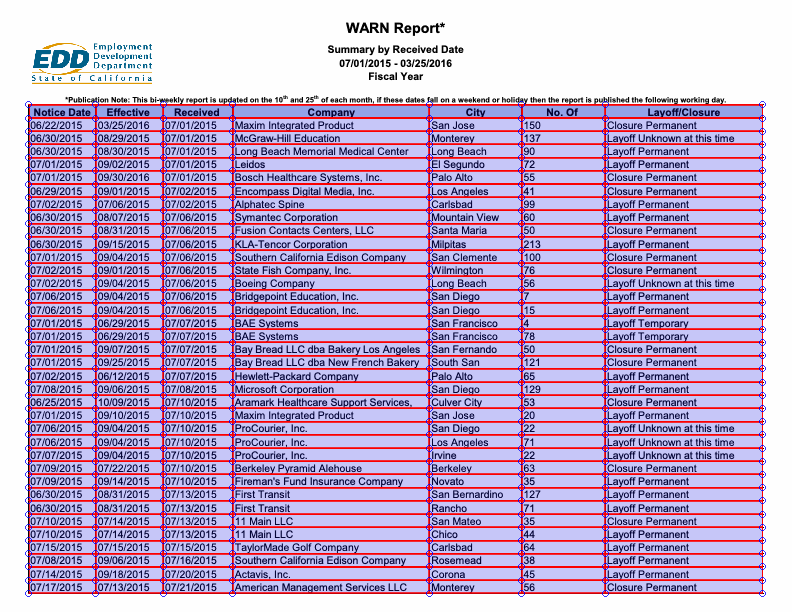

In [97]:
im.debug_tablefinder()

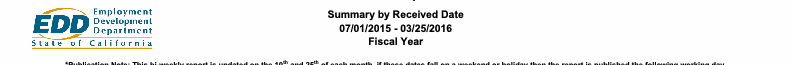

In [114]:
# 打开PDF文件
#pdf = pdfplumber.open('/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/GeneralBasicOCR1.pdf')
# 查找已检查的页面
p0 = pdf.pages[0]
month_crop = p0.within_bbox((0, 35, p0.width, 100))
month_crop.to_image()

In [115]:
month_chars = month_crop.extract_text()
month_chars

'Summary by Received Date\n07/01/2015 - 03/25/2016\nFiscal Year\nth th'

## pyMuPDF

In [122]:
pip install pymupdf pandas openpyxl

     |████████████████████████████████| 4.1 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.1 MB 8.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [132]:
import fitz

doc = fitz.open('/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/1、《省管价格公立医疗机构综合改革医疗服务价格调整方案》【2019】70号.pdf')

In [135]:
# 获取Document 文档对象的属性和方法
# 1、获取pdf 页数
pageCount = doc.page_count
print("pdf 页数", pageCount)
 
# 2、获取pdf 元数据
metaData = doc.metadata
print("pdf 元数据:", metaData)
 
# 3、获取pdf 目录信息
toc = doc.get_toc()
print("pdf 目录：", toc)

pdf 页数 102
pdf 元数据: {'format': 'PDF 1.7', 'title': '', 'author': 'Lenovo', 'subject': '', 'keywords': '', 'creator': 'WPS 表格', 'producer': '', 'creationDate': "D:20191126174907+09'30'", 'modDate': "D:20211111195112+08'00'", 'trapped': '', 'encryption': None}
pdf 目录： [[1, '空白页面', 1]]


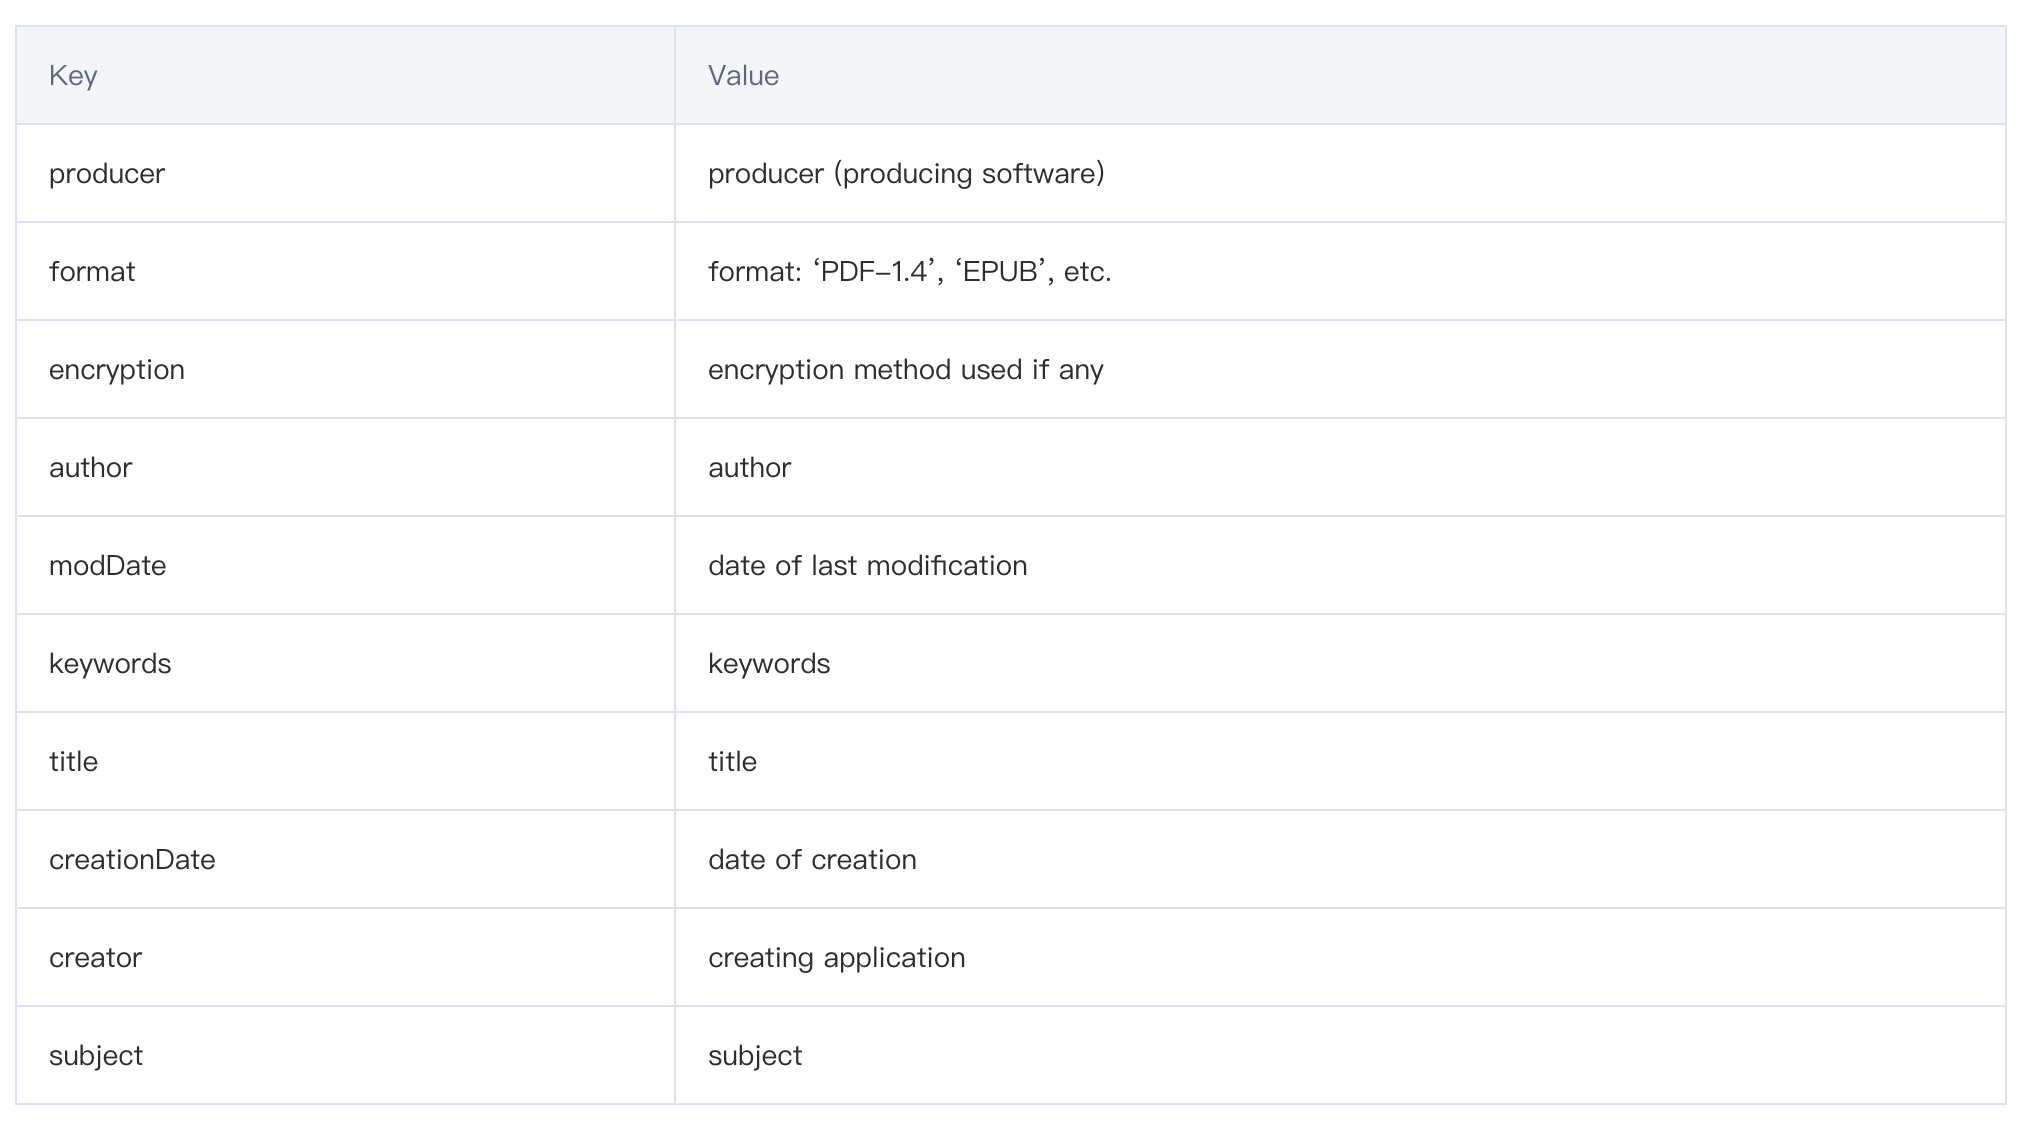

In [137]:
# 加载PDF页面
page = doc.load_page(7) # loads page number 'pno' of the document (0-based)
page = doc[0] # the short form
page

page 0 of /Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/1、《省管价格公立医疗机构综合改革医疗服务价格调整方案》【2019】70号.pdf

In [138]:
# 1、获取Page 页面的链接、批注或表单字段
links = page.get_links()
for link in links:
    # 涉及Link 对象
    print("链接:", link)
 
annots = page.annots()
for annot in annots:
    # 涉及Annot 对象
    print("批注:", annot)
 
widgets = page.widgets()
for widget in widgets:
    # 涉及表单字段
    print("表单字段:", widget)

In [139]:
# 2、Page 页面-光栅图像
page = doc[1]
pix = page.get_pixmap()
print("打印页面图像对象:", pix)
# 保存光栅图像图像,需要依赖第三方框架:Pillow
pix.pil_save("/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/pix1.png")

打印页面图像对象: Pixmap(DeviceRGB, IRect(0, 0, 596, 842), 0)


In [141]:
# 3、Page 获取文本\图像\其他信息
# 温馨提示:涉及TextPage 常量类型定义
text = page.get_text("text")
print("指定页面文本内容:", text)

指定页面文本内容: — 2 — 
〔2019〕28 号）、《关于印发治理高值医用耗材改革方案的通知》
（国办发〔2019〕37 号）、国家发展改革委、国家卫生计生委、
人力资源社会保障部、财政部《关于印发推进医疗服务价格改革
意见的通知》（发改价格〔2016〕1431 号）和国家卫生计生委、
国家发展改革委、教育部、财政部、人力资源社会保障部和国家
中医药管理局《关于加强儿童医疗卫生服务改革与发展的意见》
（国卫医发〔2016〕21 号）等文件精神，经省人民政府同意，
我们制定了《省管价格公立医疗机构综合改革医疗服务价格调整
方案》，现印发给你们，请遵照执行。 
  
附件：省管价格公立医疗机构综合改革医疗服务价格调整方案 
  
 
湖北省医疗保障局         湖北省卫生健康委员会 
 
 
 
湖北省市场监督管理局 
2019 年 11 月 26 日  
 
 
 
2



In [142]:
page = doc[7] # 下标从0开始,第五页对应4
tables = page.find_tables()
df = tables[0].to_pandas()
df
#df.to_excel('/Users/lucianowang/Documents/Working/2023YEAR/202309_LLM/202311-新产业生物demo/table1.xlsx', index=False)

,编 码,项 目 名 称,项 目 内 涵,除外内容,计价单位,价格,说 明
0,11,(一)一般医疗服务,,,,,
1,1102,2. 诊查费*,包括营养状况评估、儿童营养评估、\n营养咨询,,,,门诊注射、换药、针灸、理疗、推拿\n、血透、放射治疗疗程中不再收取诊\n查费。口腔、妇科诊查...
2,110200005,住院诊查费*,指医务人员技术劳务性服务,,日,27,
3,12,(二)一般检查治疗,,,,,
4,1201,1. 护理费*,含压疮护理、放疗后皮肤护理；包括\n波动式气垫床预防褥疮,药物、特殊消耗材\n料及特殊仪器,,,使用褥疮气垫每日加收2元。
5,120100001,重症监护*,"含24小时室内有专业护士监护,监护\n医生、护士严密观察病情、监护生命\n体征；随时记录病情...",,小时,12,
6,120100010,气管切开护理*,含吸痰、药物滴入、定时消毒、更换\n套管及纱布；包括气管插管护理,,日,40,使用吸痰机不另收费
7,1204,4. 注射,含用药指导与观察、药物的配置,一次性输液器（输\n液泵及专用管）、\n过滤器、输出血器\n、采血器、胰岛素\n笔用针头、静...,,,
8,120400002,静脉注射,包括静脉采血,,次,5,
9,120400011,中心静脉穿刺置管术,包括深静脉穿刺置管术,中心静脉套件、测\n压套件,次,70,测压加收10元
